# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# creo el csv a tratar

In [2]:
import pandas as pd
#malicious_data = pd.read_csv("TraficoMalo.csv")
#non_malicious_data = pd.read_csv("TraficoBueno.csv")
malicious_data = pd.read_csv("TraficoMaloCompleto.csv")
non_malicious_data = pd.read_csv("TraficoBuenoCompleto.csv")


#malicious_data = pd.read_csv("1000sampling.csv")
#non_malicious_data = pd.read_csv("Traficobueno1000.csv")


# Limpieza de características

In [3]:
#Elimina datos
#columnas_a_eliminar = ['exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
columnas_a_eliminar = ['srcaddr','dstaddr','exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
malicious_data = malicious_data.drop(columnas_a_eliminar, axis=1)
non_malicious_data = non_malicious_data.drop(columnas_a_eliminar, axis=1)

In [4]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176447 entries, 0 to 176446
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   dpkts      176447 non-null  int64
 1   doctets    176447 non-null  int64
 2   input      176447 non-null  int64
 3   output     176447 non-null  int64
 4   srcport    176447 non-null  int64
 5   dstport    176447 non-null  int64
 6   prot       176447 non-null  int64
 7   tos        176447 non-null  int64
 8   tcp_flags  176447 non-null  int64
dtypes: int64(9)
memory usage: 12.1 MB


In [5]:
non_malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176447 entries, 0 to 176446
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   dpkts      176447 non-null  int64
 1   doctets    176447 non-null  int64
 2   input      176447 non-null  int64
 3   output     176447 non-null  int64
 4   srcport    176447 non-null  int64
 5   dstport    176447 non-null  int64
 6   prot       176447 non-null  int64
 7   tos        176447 non-null  int64
 8   tcp_flags  176447 non-null  int64
dtypes: int64(9)
memory usage: 12.1 MB


# Clasificación


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:

# Agregar una columna de etiquetas a cada conjunto de datos
malicious_data['etiqueta'] = 1
non_malicious_data['etiqueta'] = 0
# Combinar los conjuntos de datos y mezclarlos aleatoriamente
datos = pd.concat([malicious_data, non_malicious_data]).sample(frac=1, random_state=2)

X = datos.drop('etiqueta', axis=1)
y = datos['etiqueta']
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

from sklearn.preprocessing import MinMaxScaler
# Inicializa el escalador
scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento y luego transforma los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Usa el escalador ajustado para transformar los datos de prueba
X_test = scaler.transform(X_test)



In [8]:

def evaluate_classification_model(y_true, y_pred):
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_true, y_pred)
    print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y_true, y_pred)
    print('Recall: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y_true, y_pred)
    print('Precisión: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y_true, y_pred)
    print('F1 Score: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para evaluar el modelo sin CV
def evaluate_classification_model_no_cv(model, X_test, y_test):
    # Realizar predicciones con el modelo
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print('Precisión del modelo sin CV: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print('Recall sin CV: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y_test, y_pred)
    print('Precisión sin CV: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score sin CV: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()

# Función para evaluar el modelo con CV
def evaluate_classification_model_with_cv(model, X, y, cv=5):
    # Realiza la validación cruzada y obtén las predicciones
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y, y_pred)
    print('Precisión del modelo con CV: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y, y_pred)
    print('Recall con CV: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y, y_pred)
    print('Precisión con CV: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y, y_pred)
    print('F1 Score con CV: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()



# KNeighbors

In [10]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11], # n_neighbors es el número de vecinos a considerar para las predicciones
    'weights': ['uniform', 'distance'], # weights define cómo se ponderan los vecinos en la decisión (todos iguales con 'uniform' o los más cercanos tienen más peso con 'distance')
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],# metric es la medida de distancia a usar
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],   # algorithm es el algoritmo para calcular los vecinos más cercanos                            
}

# Crear una instancia del modelo KNeighborsClassifier
model = KNeighborsClassifier()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo KNeighborsClassifier con los mejores hiperparámetros
best_model1 = KNeighborsClassifier(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model1.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model1.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
evaluate_classification_model(y_test, predictions)
"""




"from sklearn.model_selection import GridSearchCV\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Definir los hiperparámetros y sus posibles valores para la búsqueda\nparam_grid = {\n    'n_neighbors': [1, 3, 5, 7, 9, 11], # n_neighbors es el número de vecinos a considerar para las predicciones\n    'weights': ['uniform', 'distance'], # weights define cómo se ponderan los vecinos en la decisión (todos iguales con 'uniform' o los más cercanos tienen más peso con 'distance')\n    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],# metric es la medida de distancia a usar\n    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],   # algorithm es el algoritmo para calcular los vecinos más cercanos                            \n}\n\n# Crear una instancia del modelo KNeighborsClassifier\nmodel = KNeighborsClassifier()\n\n# Aplicar Grid Search\ngrid_search = GridSearchCV(model, param_grid, cv=5)\ngrid_search.fit(X_train, y_tra

Precisión del modelo sin CV: 99.78%
Recall sin CV: 99.68%
Precisión sin CV: 99.88%
F1 Score sin CV: 99.78%


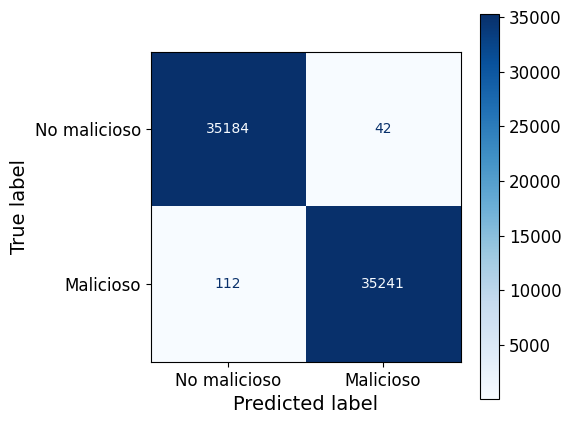

Precisión del modelo con CV: 99.32%
Recall con CV: 99.00%
Precisión con CV: 99.64%
F1 Score con CV: 99.32%


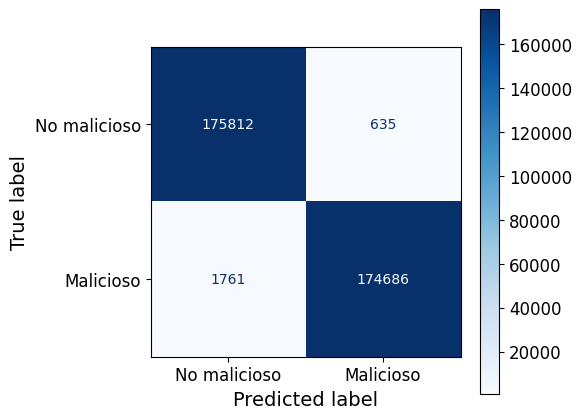

In [11]:
model = KNeighborsClassifier()

# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# LogisticRegression

In [12]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],                       # Tipo de regularización a aplicar
    'C': [0.1, 1, 10],                              # Parámetro de regularización (inverso de la fuerza de regularización)
    'solver': ['liblinear', 'saga'],                # Algoritmo de solución
    'max_iter': [1000, 2000, 3000]                  # Número máximo de iteraciones
}


# Crear una instancia del modelo LogisticRegression
model = LogisticRegression()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear una instancia del modelo LogisticRegression con los mejores hiperparámetros
best_model2 = LogisticRegression(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model2.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model2.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
evaluate_classification_model(y_test, predictions)"""


"from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\n# Definir los hiperparámetros y sus posibles valores para la búsqueda\nparam_grid = {\n    'penalty': ['l1', 'l2'],                       # Tipo de regularización a aplicar\n    'C': [0.1, 1, 10],                              # Parámetro de regularización (inverso de la fuerza de regularización)\n    'solver': ['liblinear', 'saga'],                # Algoritmo de solución\n    'max_iter': [1000, 2000, 3000]                  # Número máximo de iteraciones\n}\n\n\n# Crear una instancia del modelo LogisticRegression\nmodel = LogisticRegression()\n\n# Aplicar Grid Search\ngrid_search = GridSearchCV(model, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Obtener los mejores hiperparámetros y puntuaciones\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Crear un nuevo modelo con los mejores hiperparámet

Precisión del modelo sin CV: 85.98%
Recall sin CV: 74.53%
Precisión sin CV: 96.72%
F1 Score sin CV: 84.19%


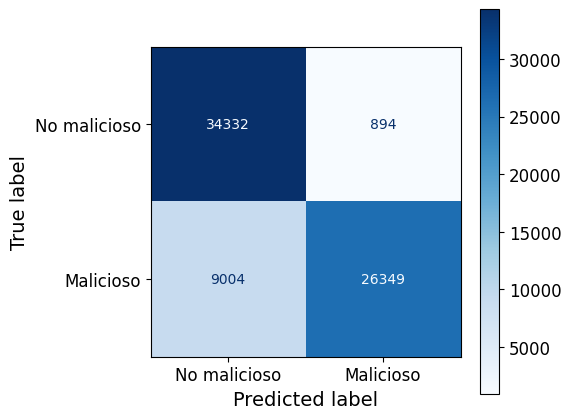

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


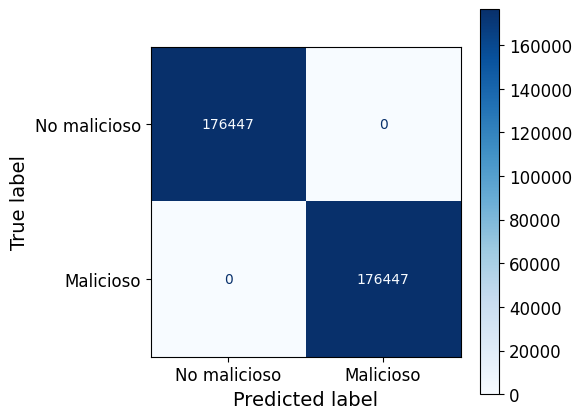

In [13]:
model = LogisticRegression(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# LinearSVC

In [14]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],             # Tipo de regularización a aplicar
    'C': [0.1, 1, 10],                   # Parámetro de regularización (inverso de la fuerza de regularización)
    'max_iter': [1000, 2000, 3000]       # Número máximo de iteraciones
}

# Crear una instancia del modelo LinearSVC
model = LinearSVC()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = LinearSVC(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear una instancia del modelo LinearSVC con los mejores hiperparámetros
best_model3 = LinearSVC(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model3.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model3.predict(X_test)

evaluate_classification_model(y_test, predictions)
"""


"from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import LinearSVC\nfrom sklearn.metrics import accuracy_score\n\n# Definir los hiperparámetros y sus posibles valores para la búsqueda\nparam_grid = {\n    'penalty': ['l1', 'l2'],             # Tipo de regularización a aplicar\n    'C': [0.1, 1, 10],                   # Parámetro de regularización (inverso de la fuerza de regularización)\n    'max_iter': [1000, 2000, 3000]       # Número máximo de iteraciones\n}\n\n# Crear una instancia del modelo LinearSVC\nmodel = LinearSVC()\n\n# Aplicar Grid Search\ngrid_search = GridSearchCV(model, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Obtener los mejores hiperparámetros y puntuaciones\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos\nbest_model = LinearSVC(**best_params)\nbest_model.fit(X_train, y_train)\n\n# Realizar predicciones y evaluar el modelo\npr

Precisión del modelo sin CV: 85.99%
Recall sin CV: 74.53%
Precisión sin CV: 96.76%
F1 Score sin CV: 84.20%


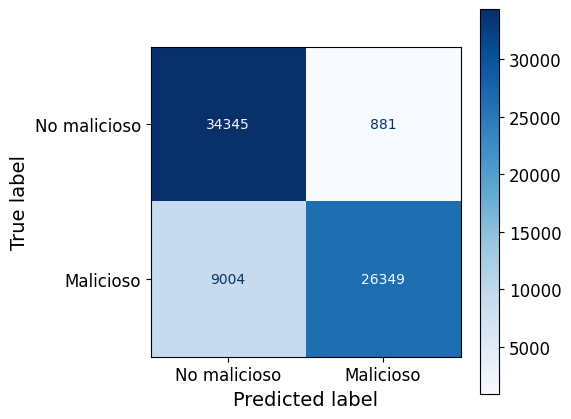

C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Precisión del modelo con CV: 99.99%
Recall con CV: 100.00%
Precisión con CV: 99.99%
F1 Score con CV: 99.99%


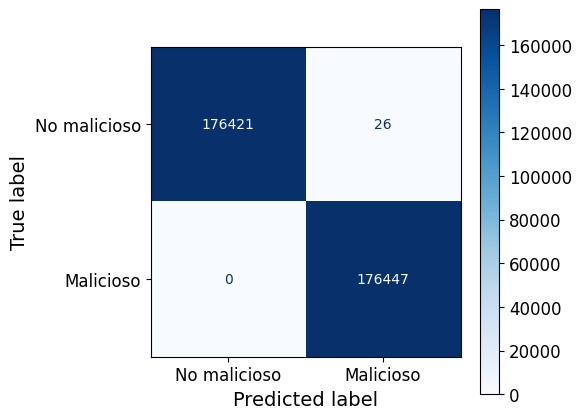

In [15]:

model = LinearSVC(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# Perceptron

In [16]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': [None, 'l1', 'l2', 'elasticnet'],   # Tipo de regularización a aplicar
    'alpha': [0.0001, 0.001, 0.01],           # Tasa de regularización
    'max_iter': [10, 100, 1000],                # Número máximo de iteraciones
    'eta0': [0.1, 0.01, 0.001],                     # Tasa de aprendizaje inicial
    'early_stopping': [True, False],
    
}

# Crear una instancia del modelo Perceptron
model = Perceptron(random_state=42)

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = Perceptron(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
# Crear una instancia del modelo Perceptron con los mejores hiperparámetros
best_model4 = Perceptron(**best_params,random_state=42)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model4.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model4.predict(X_test)

evaluate_classification_model(y_test, predictions)
"""


"from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Perceptron\nfrom sklearn.metrics import accuracy_score\n\n# Definir los hiperparámetros y sus posibles valores para la búsqueda\nparam_grid = {\n    'penalty': [None, 'l1', 'l2', 'elasticnet'],   # Tipo de regularización a aplicar\n    'alpha': [0.0001, 0.001, 0.01],           # Tasa de regularización\n    'max_iter': [10, 100, 1000],                # Número máximo de iteraciones\n    'eta0': [0.1, 0.01, 0.001],                     # Tasa de aprendizaje inicial\n    'early_stopping': [True, False],\n    \n}\n\n# Crear una instancia del modelo Perceptron\nmodel = Perceptron(random_state=42)\n\n# Aplicar Grid Search\ngrid_search = GridSearchCV(model, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Obtener los mejores hiperparámetros y puntuaciones\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los

Precisión del modelo sin CV: 100.00%
Recall sin CV: 99.99%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


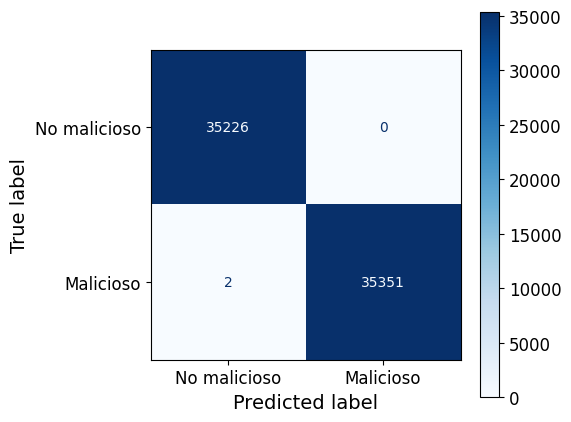

Precisión del modelo con CV: 99.96%
Recall con CV: 99.93%
Precisión con CV: 99.99%
F1 Score con CV: 99.96%


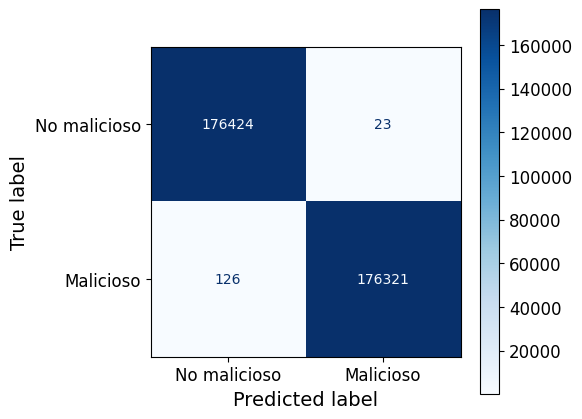

In [17]:
import matplotlib.pyplot as plt

model = Perceptron(random_state=42)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# RandomForestClassifier

In [18]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Desactivar las advertencias
#warnings.filterwarnings("ignore")

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Crear una instancia del modelo RandomForestClassifier
model = RandomForestClassifier()

# Aplicar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator = model, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Realizar validación cruzada en el mejor modelo
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_score = cv_scores.mean()

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
print('Precisión media de validación cruzada:', cv_mean_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Crear una instancia del modelo RandomForestClassifier con los mejores hiperparámetros
best_model5 = RandomForestClassifier(**best_params)

# Se entrena el modelo con los datos de entrenamiento
best_model5.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = best_model5.predict(X_test)

evaluate_classification_model(y_test, predictions)
"""


'from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import cross_val_score\n\n# Desactivar las advertencias\n#warnings.filterwarnings("ignore")\n\n# Definir los hiperparámetros y sus posibles valores para la búsqueda\nparam_grid = {\n    \'bootstrap\': [True],\n    \'max_depth\': [80, 90, 100, 110],\n    \'max_features\': [2, 3],\n    \'min_samples_leaf\': [3, 4, 5],\n    \'min_samples_split\': [8, 10, 12],\n    \'n_estimators\': [100, 200, 300, 1000]\n}\n\n# Crear una instancia del modelo RandomForestClassifier\nmodel = RandomForestClassifier()\n\n# Aplicar Grid Search con validación cruzada\ngrid_search = GridSearchCV(estimator = model, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)\ngrid_search.fit(X_train, y_train)\n\n# Obtener los mejores hiperparámetros y puntuaciones\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


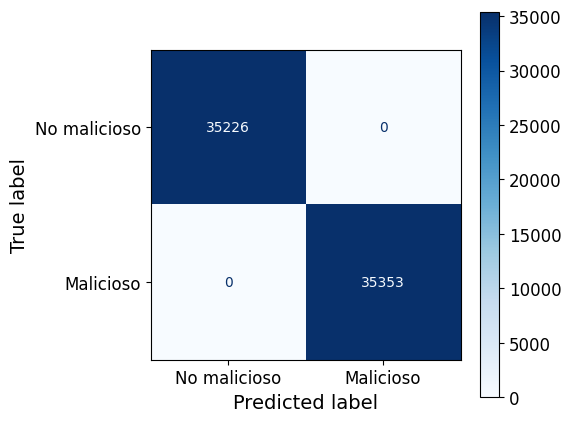

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


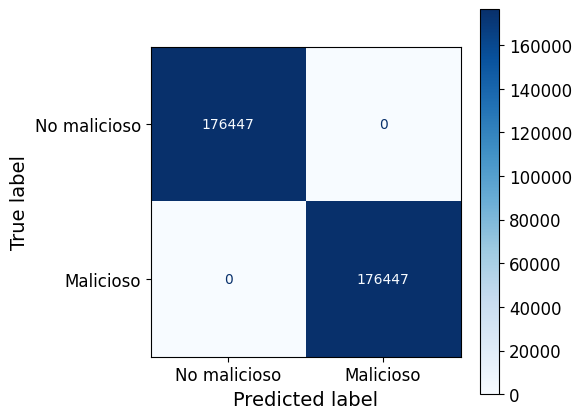

In [19]:
model = RandomForestClassifier()
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# Decision tree

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


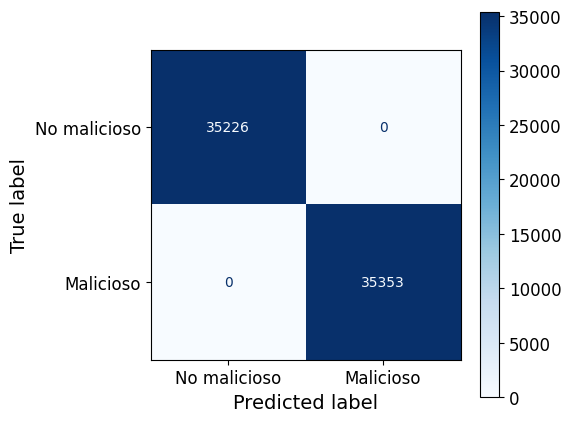

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


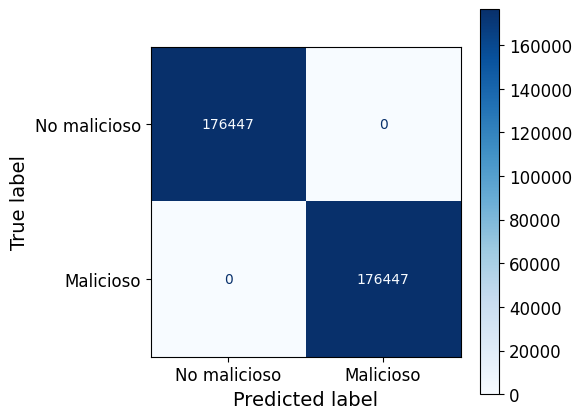

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)



# AdaBoost

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


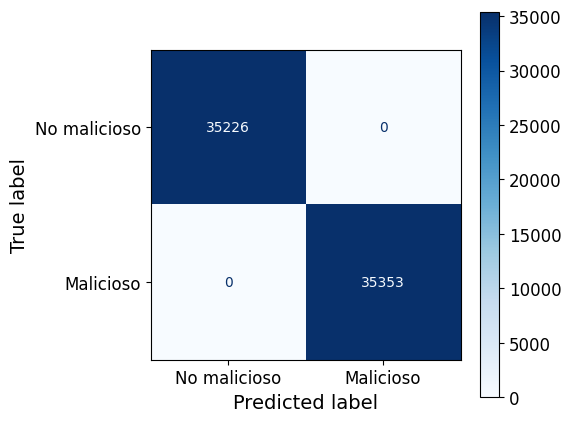

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


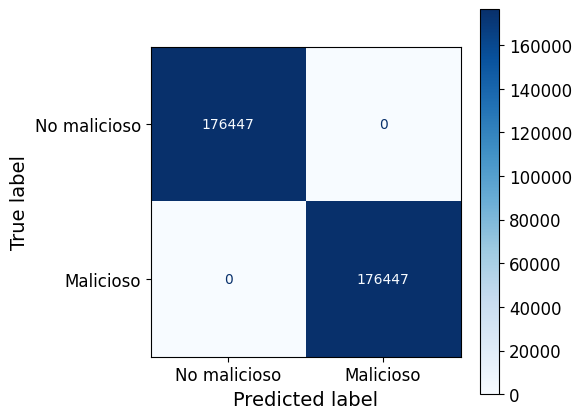

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Crear el modelo Adaboost
model = AdaBoostClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# xgboost

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


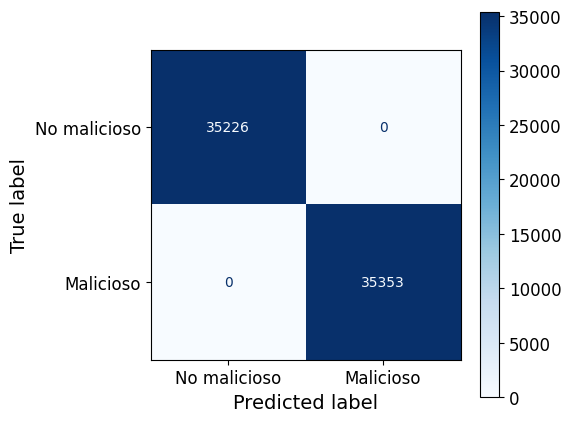

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


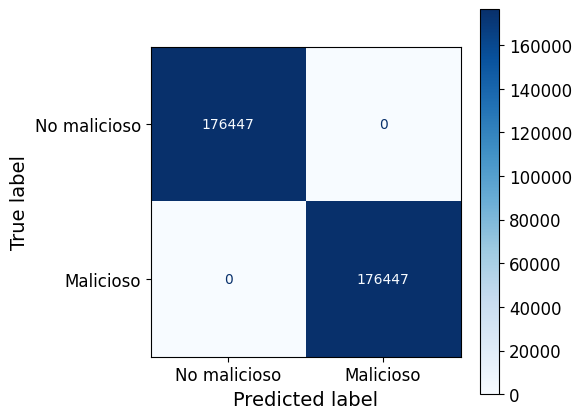

In [22]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# naive bayes

Precisión del modelo sin CV: 65.02%
Recall sin CV: 100.00%
Precisión sin CV: 58.88%
F1 Score sin CV: 74.12%


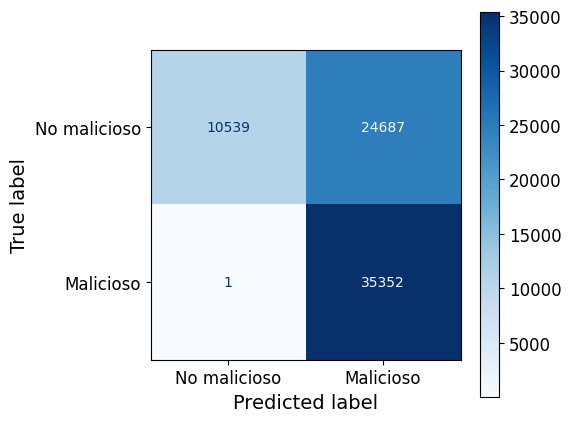

Precisión del modelo con CV: 65.29%
Recall con CV: 100.00%
Precisión con CV: 59.02%
F1 Score con CV: 74.23%


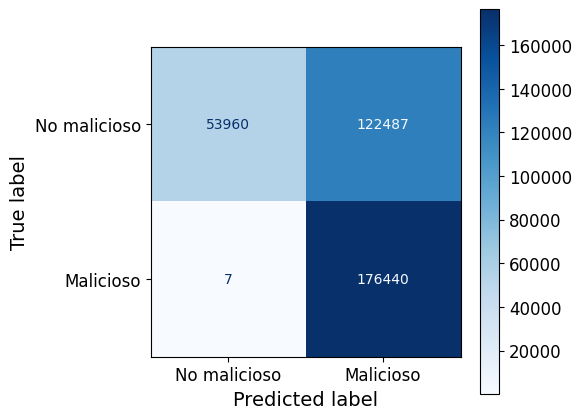

In [23]:

from sklearn.naive_bayes import GaussianNB

# Crear el modelo de clasificador Naive Bayes
model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# Ensemble Classifier con votación mayoritaria para mejorar la precisión

In [24]:
"""from sklearn.ensemble import VotingClassifier
# Crear el ensemble classifier con votación mayoritaria
ensemble_model = VotingClassifier(estimators=[('lr', best_model2), ('perceptron', best_model4), ('lsvc', best_model3), ('rf', best_model5), ('knn', best_model1)], voting='hard')

# Entrenar el ensemble classifier
ensemble_model.fit(X_train, y_train)

# Hacer predicciones con el ensemble classifier
predictions = ensemble_model.predict(X_test)

# Evaluar el rendimiento del ensemble classifier
accuracy = accuracy_score(y_test, predictions)
print('Precisión del ensemble classifier: {:.2f}%'.format(accuracy * 100))"""

"from sklearn.ensemble import VotingClassifier\n# Crear el ensemble classifier con votación mayoritaria\nensemble_model = VotingClassifier(estimators=[('lr', best_model2), ('perceptron', best_model4), ('lsvc', best_model3), ('rf', best_model5), ('knn', best_model1)], voting='hard')\n\n# Entrenar el ensemble classifier\nensemble_model.fit(X_train, y_train)\n\n# Hacer predicciones con el ensemble classifier\npredictions = ensemble_model.predict(X_test)\n\n# Evaluar el rendimiento del ensemble classifier\naccuracy = accuracy_score(y_test, predictions)\nprint('Precisión del ensemble classifier: {:.2f}%'.format(accuracy * 100))"